# 차원 감소 

# 1 . 차원의 저주 
## 고차원의 문제 
- 특성이 많아 질 수록 훈련을 느리게 하고 좋은 솔루션을 찾지 못함 
- 고차원은 많은 공간을 가짐 -> 데이터셋이 희박 (데이터간 거리가 멈)
- 예측이 더욱 불안정해짐 -> 과대적합이 커짐 

## 차원의 저주 해결하는 방법 
- 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 크기를 키우기 
  - 문제 : 차원 수가 커짐에 따라 필요한 데이터가 기하급수적으로 증가함 


# 2. 차원 감소 
- 주요 방법 
  - 투영 
  - 매니폴드 

## 차원 감소의 장점
- 특성 수를 줄여 불가능한 문제를 가능한 범위로 변경 
- 데이터 시각화에 유용 

## 투영
> 고차원 공간의 데이터를 저차원 초평면으로 곧바로 떨어트려 표현함으로서 차원 축소
- 훈련 샘플의 분포 : 대다수의 훈련데이터는 균일하게 분포되어 있지 않음 
  - 서로 강하게 연관된 특성들이 존재
-  모든 훈련샘플이 고차원 공간 안의 저차원 `부분 공간`에 놓여있음 

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # 3D 데이터 초기화
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # 고르지 않은 분포
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # 타원형
X += 0.28 * np.random.randn(m, 3)  # 노이즈 추가
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # 약간 이동

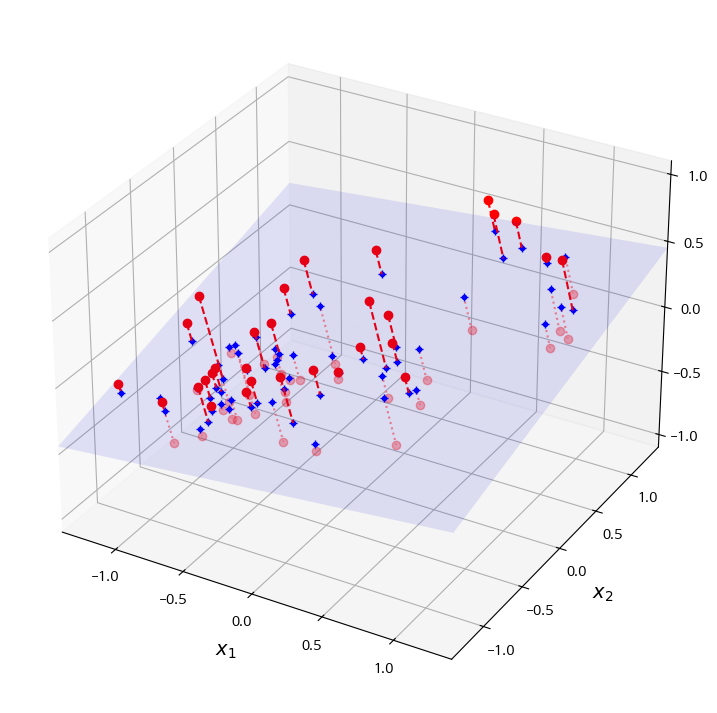

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # 2D로 축소된 데이터셋
X3D_inv = pca.inverse_transform(X2D)  # 투영된 샘플의 3D 위치
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # 투영 평면의 계수
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # 평면
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # 평면 위의 샘플
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # 평면 아래 샘플

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# 평면 아래에 샘플과 투영선을 먼저 그립니다.
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # 투영 평면
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # 투영 샘플
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# 이제 평면 위 샘플과 투영선을 그립니다.
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

plt.show()

- 3D 데이터를 2D 데이터로 축소 

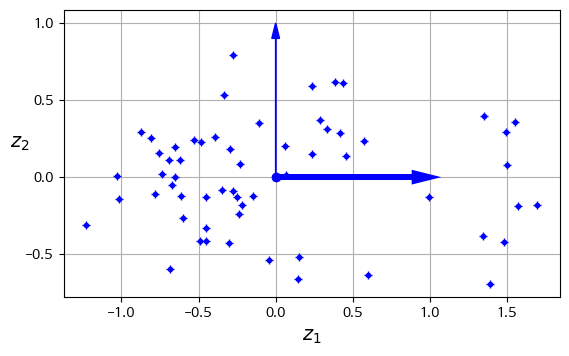

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)

## 매니폴드 학습 
> 고차원 공간에 휘어진 형태로 존재하는 저차원 공간으로, 데이터가 실제로는 이 매니폴드 위에 분포한다고 가정하고 이를 펼쳐서 차원을 축소
- 아래 데이터 처럼 `스위스 롤`같은 데이터 셋은 `투영`이 적절하지 못함 
- 2D 매니폴드는 고차원 공간에서는 휘어지거나 뒤틀린 2D 모양임 
- `매니폴드 가정` : 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여있음 
- 예시) 아무 이미지를 만드는 것보다 숫자 이미지를 만들때 자유도가 더 낮음 
- 매니 폴드는 암묵적으로 다른 가정과 병행 
  - 저차원 매니폴드 공간에 표현되면 더 간단해질 것이라는 가정 
  - 항상 유효하지 않음 -> 펼쳐지면서 더 복잡해짐 

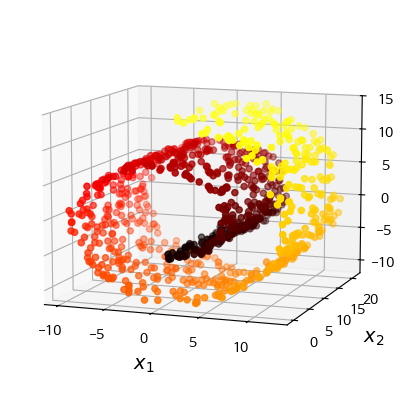

In [8]:
from sklearn.datasets import make_swiss_roll
from matplotlib.colors import ListedColormap

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
set_xyz_axes(ax, axes)

plt.show()

- 예시 : 매니폴드 데이터셋을 2D로 축소

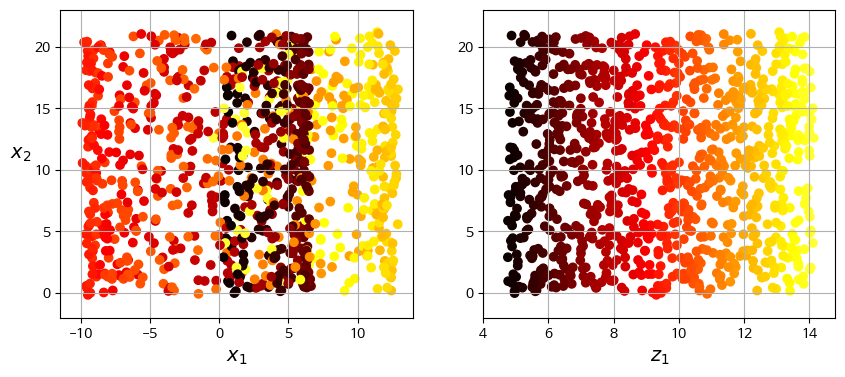

In [9]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X_swiss[:, 0], X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", labelpad=10, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis([4, 14.8, axes[2], axes[3]])
plt.xlabel("$z_1$")
plt.grid(True)

plt.show()

- 예시 :  $x_1 = 5$ 결정경계에서  펼치면 더 복잡해짐

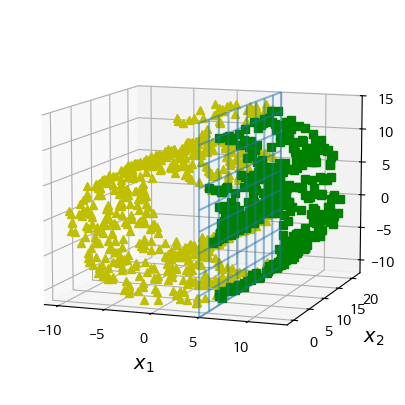

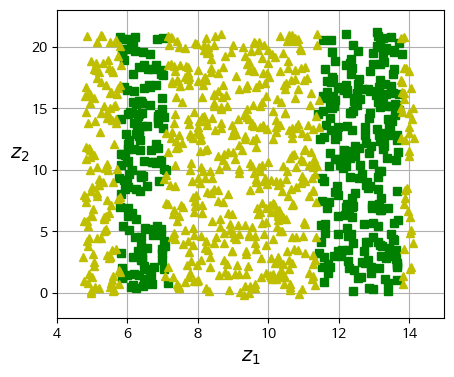

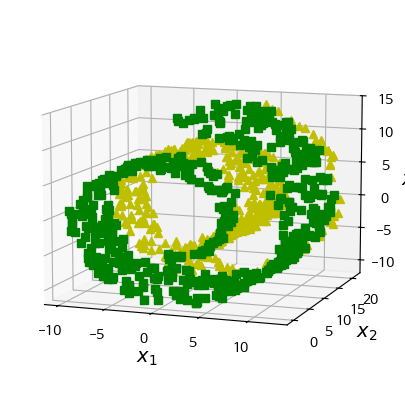

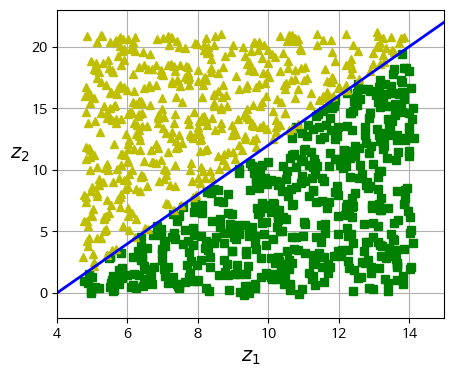

In [10]:
axes = [-11.5, 14, -2, 23, -12, 15]
x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

positive_class = X_swiss[:, 0] > 5
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
set_xyz_axes(ax, axes)
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
plt.show()

positive_class = 2 * (t[:] - 4) > X_swiss[:, 1]
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel("$x_1$", rotation=0)
ax.set_ylabel("$x_2$", rotation=0)
ax.set_zlabel("$x_3$", rotation=0)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.plot([4, 15], [0, 22], "b-", linewidth=2)
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
plt.show()

# 3. 주성분 분석 (PCA)

> 데이터에 가장 가까운 `초평면`을 정의한 뒤, 데이터를 이 평면에 투영 

## 분산 보존
- `올바른 초평면`의 선택 
  - 저차원 초평면에 훈련 세트를 투영하기 전에 선택 필요 
- 분산이 `최대로 보존`되는 축 
- -> 정보가 가장 `적게 손실` 
- -> 원본 데이터셋과 투영된 것 사이 `평균 제곱 거리 최소화`


# 주성분 
> 데이터의 분산을 가장 잘 설명하는 새로운 축 

- PCA는 훈련세트에서 `분산`이 `최대`인 축 선택 
- 아래 그림에서 `실선`을 축으로 선택 

## 주성분 선택 과정 
- 이전 주성분에 `직교`하고 남은 분산이 `최대`인 축 선택

## 주성분을 찾는 방법 
- `특잇값 분해`
  - 표준행렬 분해 기술 
  - 행렬 X를 세 개의 행렬의 곱인 $U \cdot \Sigma \cdot V^T$로 분해
  - $V$ : 모든 주성분의 단위 벡터 
  - $V = (c_1, c_2 .... c_n)$

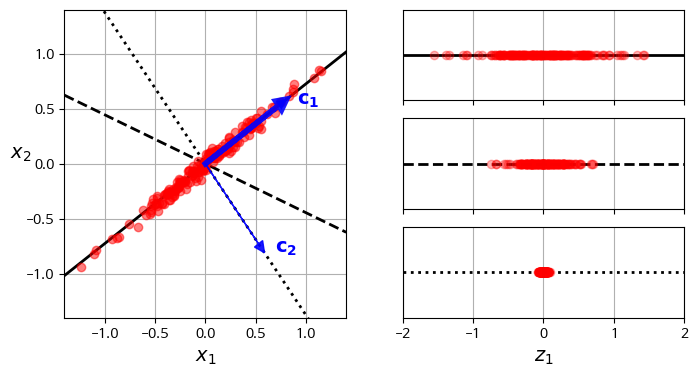

In [11]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X_line = np.random.randn(m, 2) / 10
X_line = X_line @ np.array([[stretch, 0], [0, 1]])  # 스트레치
X_line = X_line @ [[np.cos(angle), np.sin(angle)],
                   [np.sin(angle), np.cos(angle)]]  # 회전

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi / 6), np.sin(angle - 2 * np.pi / 6)])
u3 = np.array([np.cos(angle - np.pi / 2), np.sin(angle - np.pi / 2)])

X_proj1 = X_line @ u1.reshape(-1, 1)
X_proj2 = X_line @ u2.reshape(-1, 1)
X_proj3 = X_line @ u3.reshape(-1, 1)

plt.figure(figsize=(8, 4))
plt.subplot2grid((3, 2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4 * u1[1] / u1[0], 1.4 * u1[1] / u1[0]], "k-",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u2[1] / u2[0], 1.4 * u2[1] / u2[0]], "k--",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u3[1] / u3[0], 1.4 * u3[1] / u3[0]], "k:",
         linewidth=2)
plt.plot(X_line[:, 0], X_line[:, 1], "ro", alpha=0.5)
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=4, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=1, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", color="blue")
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.grid()

plt.subplot2grid((3, 2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=2)
plt.plot(X_proj1[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=2)
plt.plot(X_proj2[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$")
plt.grid()

plt.show()

### 넘파이를 통한 구현
- 넘파이의 `svd()`를 이용해 주성분을 정의하는 단위 벡터 추출 

In [13]:
import numpy as np

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]
m, n = X.shape
Σ = np.zeros_like(X_centered)
Σ[:n, :n] = np.diag(s)
assert np.allclose(X_centered, U @ Σ @ Vt)

## d차원으로 투영 
- 주성분 추출 후, 처음 d개의 주성분으로 정의한 `초평면`에 투영하여 데이터셋의 차원을 d차원으로 축소 
    - 초평면은 분산을 가능한 최대로 보존하는 투영임을 보장 

### 축소된 데이터 셋 구하기 
$X_{d-proj} = X \cdot W_d$
- $X_{d-proj}$ 초평면에 훈련 세트를 투영하고 d차원으로 축소된 데이터 셋
- $X$ : 원래 데이터 셋 
- $W_d$ : V의 첫 d열로 구성된 행렬

- 파이썬으로 구현 

In [14]:
W2 = Vt[:2].T
X2D = X_centered @ W2

## 사이킷런 사용 
- PCA 모델을 이용한 차원 축소 
- 결과로 $W_d$의 전치가 `components_` 속성에 저장됨

In [16]:
from sklearn.decomposition import PCA
### 2차원으로 감소 
pca = PCA(n_components=2)
# 2D로 축소된 데이터셋
X2D = pca.fit_transform(X)  

print("주성분:", pca.components_)

주성분: [[ 0.67857588  0.70073508  0.22023881]
 [ 0.72817329 -0.6811147  -0.07646185]]


## 설명된 분산의 비율 
> 주성분의 축을 따라 있는 데이터셋의 분산 비율 
- `explained_variance_ratio_` 에 저장

- 예시 : 
  - 데이터 분산의 76%가 첫번째 주성분에 따라 놓임 
  - 데이터 분산의 15%가 두번째 부성분에 따라 놓임 

In [17]:
print("설명된 분산의 비율 : ", pca.explained_variance_ratio_)

설명된 분산의 비율 :  [0.7578477  0.15186921]


## 적절한 차원 수 선택 
- 축소할 차원 수를 선택하기 위해서는 `충분한 분산`이 될 때까지 더해야 할 차원 수를 선택 

- 예시 : MNIST 데이터셋에서 PCA를 사용하여 차원 축소
  - 분산 95%보존한 채로 필요한 최소 차원으로 계산 

In [22]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

### MNIST 데이터셋을 훈련 세트와 테스트 세트로 나누기 
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

### PCA를 사용하여 MNIST 데이터셋의 차원 축소
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

### PCA 객체 선언 
pca = PCA(n_components=0.95) 
X_reduced = pca.fit_transform(X_train)

### d차원 축소된 데이터셋의 차원 확인
print("축소된 데이터셋의 차원:", pca.n_components_)

### 설명가능한 분산 비율 
print("설명된 분산의 비율:",pca.explained_variance_ratio_.sum())

축소된 데이터셋의 차원: 154
설명된 분산의 비율: 0.9501960192613035


- 그래프로 확인 하기 
  - 변곡점인 엘보 찾기 = 154

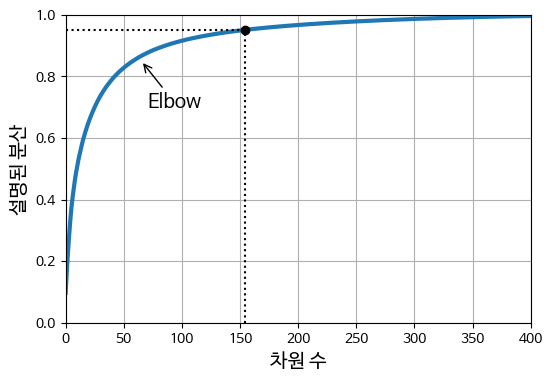

In [20]:
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("차원 수")
plt.ylabel("설명된 분산")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

- 전처리 단계에서 차원 축소 사용하는 경우 `차원 수`를 `튜닝` 가능 
  - `PCA`로 차원 축소
  - 랜덤포레스트를 이용해 분류 수행 
  - `Randomized PCA`를 사용하여 잘 맞는 하이퍼파라미터 조합 선택 

- 예시 : 1000개 샘플을 10회 반복 

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

### 분류기 선언 
clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))

### 하이퍼파라미터 그리드 선언
param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500)
}

### 랜덤 서치 선언
rnd_search = RandomizedSearchCV(clf, param_distrib,
                               n_iter=10, cv=3, random_state=42)

### 랜덤 서치 실행
rnd_search.fit(X_train[:1000], y_train[:1000])

### 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", rnd_search.best_params_)

최적의 하이퍼파라미터: {'randomforestclassifier__n_estimators': np.int64(475), 'pca__n_components': np.int64(57)}


## 압축을 위한 PCA 
- 차원 축소 후 훈련 세트는 훨씬 적은 공간 차지
  - 예시 : 784 차원 -> 154 차원으로 축소
  - 원본의 20%로 줄지만 분산 손해는 5%만 손실 
  - 알고리즘의 속도를 크게 높일 수 있음
- `재구성 오차` : 원본데이터와 재구성된 데이터 사이의 `평균 제곱 거리`

### PCA 역변환
- 복원은 `inverse_transform()` 메서드로 가능
- $X_{recovered} = X_{d-proj} \cdot W_d^T$

- 예시 : 글자 데이터 압축 후 복원

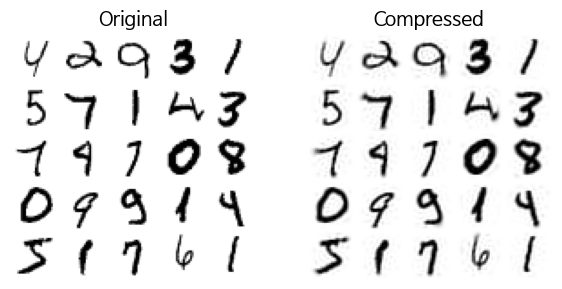

In [28]:
pca = PCA(0.95)
X_reduced = pca.fit_transform(X_train, y_train)

X_recovered = pca.inverse_transform(X_reduced)

plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")


## 랜덤 PCA
- 확률적 알고리즘을 사용해 처음 d개의 주성분에 대한 근사값을 빠르게 찾음 
- 사이킷런에서 `svd_solver = "randomized"` 로 설정
  - `svd_solver`의 기본 값은 `auto`이지만 `n_components` 가 `min(m,n)`의 80% 인 경우 랜덤 PCA 알고리즘 사용  
- 계산 복잡도 : $O(m \times d^2) + O(d^3)$

In [29]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## 점진적 PCA
- 미니 배치로 나눈뒤 한번에 하나씩 주입하는 PCA
- 사이킷런의 `IncrementalPCA` 클래스 사용
- `fit()` 매서드가 아니라 `partial_fit()` 를 미니배치 마다 호출 

In [30]:
from sklearn.decomposition import IncrementalPCA

### 배치 크기 설정 
n_batches = 100

### 점신적 PCA 
inc_pca = IncrementalPCA(n_components=154)

###미니 배치 수행 
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

- `memmap` 클래스를 사용해 마치 메모리에 있는 것처럼 조작 가능 
- `flush()`를 호출하여 캐시에 남아있는 모든 데이터가 디스크에 저장 

- 예시 : `meanmap` 이용 

In [31]:
filename ="my_mnist.mmap"
X_map = np.memmap(
                  filename, 
                  dtype=np.float32, 
                  mode="write",
                  shape=X_train.shape)

X_map[:] = X_train
X_map.flush()  # 메모리 맵 파일에 변경 사항 저장

- `memmap`을 로드해 `넘파이 배열`처럼 사용 가능 
- fit 함수를 사용 할 수 있어 좋음

In [32]:
X_map = np.memmap(
    filename,
    dtype=np.float32,
    mode="readonly").reshape(-1, 784)

batch_size  = X_map.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_map)

IncrementalPCA(batch_size=600, n_components=154)

- 단 매우 고차원 데이터셋은 PCA가 너무 느려 질 수 있음 
- 계산 복잡도 : $O(m \times d^2) + O(d^3)$

# 4. 랜덤 투영 
> 랜덤한 선형 투영을 사용하여 데이터를 저차원 공간에 투영 
- 랜덤 투영은 실제로 거리를 상당히 잘 보존함 
- 투영 후에도 비슷한 샘플은 비슷하고 다른 샘플은 매우 다른 채로 남음 

### 최적의 차원 수 선택 
- 허용 오차 이상으로 변하지 않도록 보장하기 위해 보존 할 최소 자원 수를 결정하는 방정식 만듦 
- 방식은 `johnson_lindenstrauss_min_dim()` 함수로 구현 

- 예시 : `johnson_lindenstrauss_min_dim()` 함수로 구현 

In [33]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, e = 5_000, 0.1 
d = johnson_lindenstrauss_min_dim(m, eps=e)

print("최소 차원:", d)

최소 차원: 7300


# 지역 선형 임베딩 
>  LLE는 먼저 각 훈련 샘플이 최근접 이웃에 얼마나 선형적인 연관이 되어 있는지 측정 
> 그 이후 국부적인 관계가 가장 잘 보존되는 저차원 표현을 찾는 매니폴드 학습 

- 샘플간 거리가 잘 보존됨 

- 예시 : LocallylinarEmbedding 을 이용해 펼침 

In [34]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

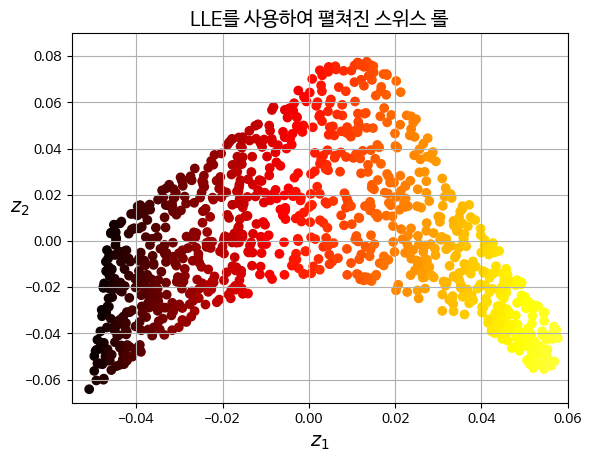

In [35]:
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)
plt.title("LLE를 사용하여 펼쳐진 스위스 롤")
plt.show()

### LLE 작동 원리 
- 샘플 $x^{(i)}$에 대해 k개의 최근접 이웃 찾기 
- 이웃에 대한 선형 함수로 $x^{(i)}$를 재구성